<a href="https://colab.research.google.com/github/Jassk28/BluebashAssignment/blob/main/BluebashAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score

In [97]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [98]:
#loading dataset
beer_dataset= pd.read_csv('train.csv')


In [99]:
#number of rows and columns in the dataset
beer_dataset.shape

(500, 19)

In [100]:
beer_dataset

,index,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,review/timeStruct,review/timeUnix,user/ageInSeconds,user/birthdayRaw,user/birthdayUnix,user/gender,user/profileName
0,1,3.6,8930,2001,Beer_1,Style_1,4.6,4.5,1.1,3.7,3.0,Sample review text 1,{},1270694890,1370639193,1994-01-17,634938105,Female,User_1
1,2,3.1,7517,2838,Beer_2,Style_2,2.5,4.3,1.6,3.1,4.3,Sample review text 2,{},1633758530,1010221032,1991-05-16,1087792070,Male,User_2
2,3,10.9,3422,610,Beer_3,Style_3,3.8,3.6,4.3,1.6,2.3,Sample review text 3,{},1095407031,1549421939,1998-01-13,677350097,Other,User_3
3,4,6.2,9865,1591,Beer_4,Style_4,3.4,2.8,3.6,3.1,2.6,Sample review text 4,{},1473103895,1295916169,1996-06-18,675891583,Female,User_4
4,5,12.0,6985,2218,Beer_5,Style_5,1.2,4.7,2.5,4.7,3.8,Sample review text 5,{},1657713136,1331020882,1991-02-15,891117825,NaN,User_5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,11.2,8038,1298,Beer_496,Style_6,1.2,2.3,1.2,4.5,4.2,Sample review text 496,{},1194576729,1700010262,1990-03-15,921132829,NaN,User_496
496,497,8.6,9102,2463,Beer_497,Style_7,2.2,4.9,2.7,3.9,1.5,Sample review text 497,{},1636130126,1143374490,1994-05-16,847608865,Other,User_497
497,498,7.0,7025,2848,Beer_498,Style_8,2.2,3.8,3.3,1.3,3.9,Sample review text 498,{},1369576830,891775831,1995-06-12,908427315,Female,User_498
498,499,9.5,7498,2696,Beer_499,Style_9,3.5,2.6,1.3,1.2,1.3,Sample review text 499,{},1267246828,1288817250,1994-03-18,1083590630,Male,User_499


In [101]:
beer_dataset.isnull()

,index,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,review/timeStruct,review/timeUnix,user/ageInSeconds,user/birthdayRaw,user/birthdayUnix,user/gender,user/profileName
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
496,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
497,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
498,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [102]:
# Load the dataset
file_path = "train.csv"
df = pd.read_csv(file_path)

In [103]:
# Display the first few rows to check the data
print("Dataset Preview:")
df.head()

Dataset Preview:


,index,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,review/timeStruct,review/timeUnix,user/ageInSeconds,user/birthdayRaw,user/birthdayUnix,user/gender,user/profileName
0,1,3.6,8930,2001,Beer_1,Style_1,4.6,4.5,1.1,3.7,3.0,Sample review text 1,{},1270694890,1370639193,1994-01-17,634938105,Female,User_1
1,2,3.1,7517,2838,Beer_2,Style_2,2.5,4.3,1.6,3.1,4.3,Sample review text 2,{},1633758530,1010221032,1991-05-16,1087792070,Male,User_2
2,3,10.9,3422,610,Beer_3,Style_3,3.8,3.6,4.3,1.6,2.3,Sample review text 3,{},1095407031,1549421939,1998-01-13,677350097,Other,User_3
3,4,6.2,9865,1591,Beer_4,Style_4,3.4,2.8,3.6,3.1,2.6,Sample review text 4,{},1473103895,1295916169,1996-06-18,675891583,Female,User_4
4,5,12.0,6985,2218,Beer_5,Style_5,1.2,4.7,2.5,4.7,3.8,Sample review text 5,{},1657713136,1331020882,1991-02-15,891117825,NaN,User_5


In [104]:
# Drop unnecessary columns that are not useful for numerical predictions
drop_columns = ["index",  "review/timeStruct", "user/birthdayRaw", "user/profileName"]   #"review/text",
df = df.drop(columns=[col for col in drop_columns if col in df.columns])

In [105]:
df.head(100)

,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,review/timeUnix,user/ageInSeconds,user/birthdayUnix,user/gender
0,3.6,8930,2001,Beer_1,Style_1,4.6,4.5,1.1,3.7,3.0,Sample review text 1,1270694890,1370639193,634938105,Female
1,3.1,7517,2838,Beer_2,Style_2,2.5,4.3,1.6,3.1,4.3,Sample review text 2,1633758530,1010221032,1087792070,Male
2,10.9,3422,610,Beer_3,Style_3,3.8,3.6,4.3,1.6,2.3,Sample review text 3,1095407031,1549421939,677350097,Other
3,6.2,9865,1591,Beer_4,Style_4,3.4,2.8,3.6,3.1,2.6,Sample review text 4,1473103895,1295916169,675891583,Female
4,12.0,6985,2218,Beer_5,Style_5,1.2,4.7,2.5,4.7,3.8,Sample review text 5,1657713136,1331020882,891117825,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,6.3,2471,2318,Beer_96,Style_6,2.9,2.6,2.3,3.4,4.9,Sample review text 96,1703154815,746114840,862378159,Female
96,7.9,7595,2387,Beer_97,Style_7,2.3,3.0,2.6,4.5,4.6,Sample review text 97,1203986132,573835941,783795499,Female
97,9.7,2142,559,Beer_98,Style_8,3.5,1.6,4.6,3.3,2.5,Sample review text 98,1496391104,1890333560,852821493,Male
98,6.7,3568,1044,Beer_99,Style_9,4.9,4.5,4.0,1.9,4.1,Sample review text 99,1337864160,1620853337,894170916,Other


In [106]:
# Fill missing numerical values with the median (if any)
numerical_cols = df.select_dtypes(include=['number']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

In [107]:
df.head(100)

,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,review/timeUnix,user/ageInSeconds,user/birthdayUnix,user/gender
0,3.6,8930,2001,Beer_1,Style_1,4.6,4.5,1.1,3.7,3.0,Sample review text 1,1270694890,1370639193,634938105,Female
1,3.1,7517,2838,Beer_2,Style_2,2.5,4.3,1.6,3.1,4.3,Sample review text 2,1633758530,1010221032,1087792070,Male
2,10.9,3422,610,Beer_3,Style_3,3.8,3.6,4.3,1.6,2.3,Sample review text 3,1095407031,1549421939,677350097,Other
3,6.2,9865,1591,Beer_4,Style_4,3.4,2.8,3.6,3.1,2.6,Sample review text 4,1473103895,1295916169,675891583,Female
4,12.0,6985,2218,Beer_5,Style_5,1.2,4.7,2.5,4.7,3.8,Sample review text 5,1657713136,1331020882,891117825,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,6.3,2471,2318,Beer_96,Style_6,2.9,2.6,2.3,3.4,4.9,Sample review text 96,1703154815,746114840,862378159,Female
96,7.9,7595,2387,Beer_97,Style_7,2.3,3.0,2.6,4.5,4.6,Sample review text 97,1203986132,573835941,783795499,Female
97,9.7,2142,559,Beer_98,Style_8,3.5,1.6,4.6,3.3,2.5,Sample review text 98,1496391104,1890333560,852821493,Male
98,6.7,3568,1044,Beer_99,Style_9,4.9,4.5,4.0,1.9,4.1,Sample review text 99,1337864160,1620853337,894170916,Other


In [108]:
# Convert categorical columns to numeric values
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].astype('category').cat.codes

In [109]:
df.head(50)

,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,review/timeUnix,user/ageInSeconds,user/birthdayUnix,user/gender
0,3.6,8930,2001,0,1,4.6,4.5,1.1,3.7,3.0,0,1270694890,1370639193,634938105,0
1,3.1,7517,2838,111,2,2.5,4.3,1.6,3.1,4.3,111,1633758530,1010221032,1087792070,1
2,10.9,3422,610,222,3,3.8,3.6,4.3,1.6,2.3,222,1095407031,1549421939,677350097,2
3,6.2,9865,1591,333,4,3.4,2.8,3.6,3.1,2.6,333,1473103895,1295916169,675891583,0
4,12.0,6985,2218,444,5,1.2,4.7,2.5,4.7,3.8,444,1657713136,1331020882,891117825,-1
5,7.0,7947,2920,456,6,1.3,4.3,3.0,1.1,4.7,456,1736299724,903422046,760449267,-1
6,4.7,9784,695,467,7,1.1,3.0,4.6,3.6,1.4,467,1522386655,1371867528,1028741257,2
7,10.0,8635,625,478,8,2.5,3.8,3.5,1.3,4.4,478,1467521124,831734812,1091972971,2
8,11.3,4668,761,489,9,4.0,3.3,2.6,1.0,4.2,489,1225672911,1342254756,870411265,1
9,10.3,7462,1423,1,0,1.7,3.4,1.5,1.6,2.3,1,1722587426,1128456180,1055943099,-1


In [110]:
# Define the independent variables (X) and dependent variable (y)
X = df.drop(columns=["review/overall"])  # Features
y = df["review/overall"]  # Target variable (the value we want to predict)

In [111]:
# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [112]:
# Initialize the models
linear_model = LinearRegression()
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)


In [113]:
# Train the Linear Regression model
linear_model.fit(X_train, y_train)


LinearRegression()

In [114]:
# # Import necessary libraries
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
file_path = "train.csv"
df = pd.read_csv(file_path)

# Select only required columns
df = df[["beer/name", "beer/style", "review/text", "review/overall"]].dropna()

# Convert categorical columns to numerical using Label Encoding
label_enc_name = LabelEncoder()
label_enc_style = LabelEncoder()

df["beer/name"] = label_enc_name.fit_transform(df["beer/name"])
df["beer/style"] = label_enc_style.fit_transform(df["beer/style"])

# Convert text (review/text) into numerical form using TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=500)  # Limit to 500 most important words
X_text = tfidf_vectorizer.fit_transform(df["review/text"]).toarray()

# Combine all features
X = np.hstack((df[["beer/name", "beer/style"]].values, X_text))
y = df["review/overall"]

# Split the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
y_pred = linear_model.predict(X_test)

# Evaluate model performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"\nModel Performance:")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

# Function to Predict New Beer Rating
def predict_beer_rating(beer_name, beer_style, review_text):
    # Encode categorical values
    name_encoded = label_enc_name.transform([beer_name])[0] if beer_name in label_enc_name.classes_ else 0
    style_encoded = label_enc_style.transform([beer_style])[0] if beer_style in label_enc_style.classes_ else 0

    # Convert text to numerical using TF-IDF
    text_features = tfidf_vectorizer.transform([review_text]).toarray()

    # Combine all features
    input_features = np.hstack(([[name_encoded, style_encoded]], text_features))

    # Predict rating
    predicted_rating = linear_model.predict(input_features)

    return predicted_rating[0]

# Example Prediction
# predicted_rating = predict_beer_rating("Guinness Draught", "Stout", "This beer has a smooth and creamy taste with a hint of chocolate and coffee.")
predicted_rating = predict_beer_rating("Beer_5", "Style_5", "Sample review text 5")
print(f"\nPredicted Overall Rating: {predicted_rating:.2f}")



Model Performance:
RMSE: 1.4828
R² Score: -0.7198

Predicted Overall Rating: 3.39


In [115]:
# Train the Random Forest model
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [116]:
# Make predictions on the test set with both models
y_pred_linear = linear_model.predict(X_test)
y_pred_rf = random_forest_model.predict(X_test)

In [117]:
# Calculate performance metrics for Linear Regression
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
r2_linear = r2_score(y_test, y_pred_linear)

In [118]:
# Calculate performance metrics for Random Forest
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

In [119]:
# Print the results for Linear Regression
print("\nLinear Regression Results:")
print(f"RMSE: {rmse_linear:.4f}")
print(f"R² Score: {r2_linear:.4f}")
# Lower RMSE → Better model performance.
# R² closer to 1 → Model explains variations well.


Linear Regression Results:
RMSE: 1.4828
R² Score: -0.7198


In [120]:
# Print the results for Random Forest
print("\nRandom Forest Results:")
print(f"RMSE: {rmse_rf:.4f}")
print(f"R² Score: {r2_rf:.4f}")


Random Forest Results:
RMSE: 1.2221
R² Score: -0.1683


In [121]:
y_pred_linear = linear_model.predict(X_test)

# Compare actual vs. predicted ratings
predictions_df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred_linear})
print(predictions_df.head(10))  # Show first 10 results ####


     Actual  Predicted
361     2.9   3.578422
73      1.2   4.382321
374     4.7   3.389013
155     1.3   1.976039
104     3.2   1.759397
394     4.1   3.508918
377     4.1   3.139653
124     4.8   1.879302
68      4.4   3.906767
450     4.8   4.206564


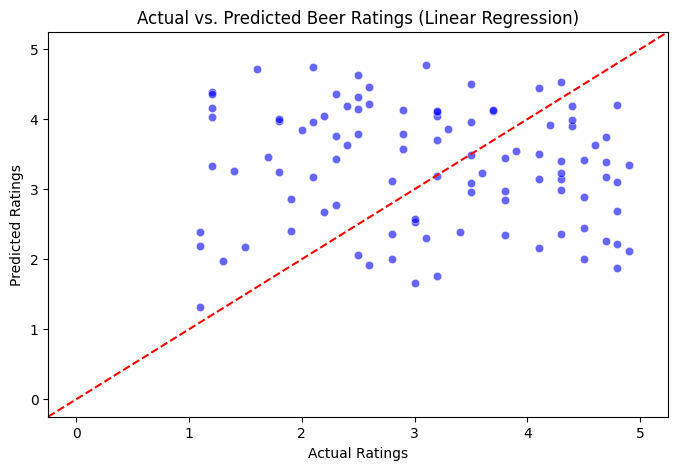

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred_linear, color='blue', alpha=0.6)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs. Predicted Beer Ratings (Linear Regression)")
plt.axline([0, 0], [5, 5], color="red", linestyle="--")  # Perfect match line
plt.show()


In [123]:
# Compare the performance
if rmse_rf < rmse_linear:
    print("\n Random Forest performed better based on RMSE.")
else:
    print("\n Linear Regression performed better based on RMSE.")


 Random Forest performed better based on RMSE.


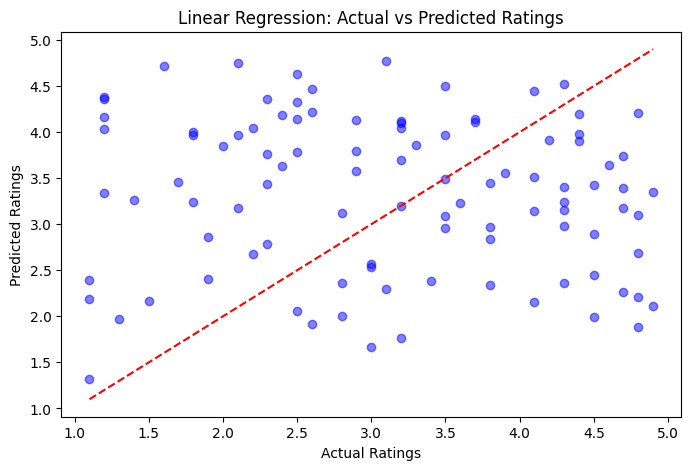

In [124]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_linear, alpha=0.5, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='dashed', color='red')
plt.title("Linear Regression: Actual vs Predicted Ratings")
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.show()

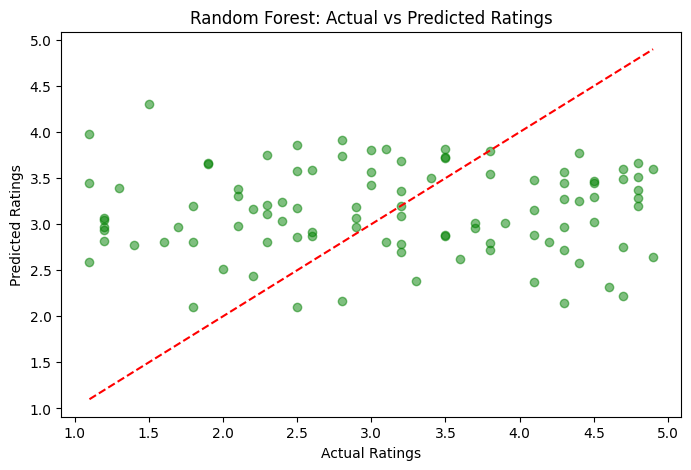

In [125]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='dashed', color='red')
plt.title("Random Forest: Actual vs Predicted Ratings")
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.show()

In [126]:
print(df["review/overall"].describe())


# mean → Average rating of the beer.
# min, max → Lowest and highest ratings.
# std → Standard deviation (variation in ratings)

count    500.000000
mean       3.076600
std        1.171553
min        1.000000
25%        2.100000
50%        3.050000
75%        4.100000
max        5.000000
Name: review/overall, dtype: float64


In [127]:
print(df["review/overall"].value_counts()) #To see how many reviews exist for each rating

review/overall
4.8    18
2.9    18
4.5    18
3.8    17
2.3    17
1.2    16
3.0    16
4.7    16
3.2    15
3.5    15
4.3    14
2.0    14
2.6    14
2.2    14
4.9    14
1.9    14
4.4    13
2.5    13
1.8    12
4.6    12
1.6    12
1.3    12
2.1    12
4.0    11
4.1    11
1.1    11
3.4    11
3.6    11
3.7    10
2.8    10
3.1    10
1.5    10
1.4     9
3.9     9
3.3     9
5.0     9
2.4     8
4.2     7
1.7     7
2.7     7
1.0     4
Name: count, dtype: int64


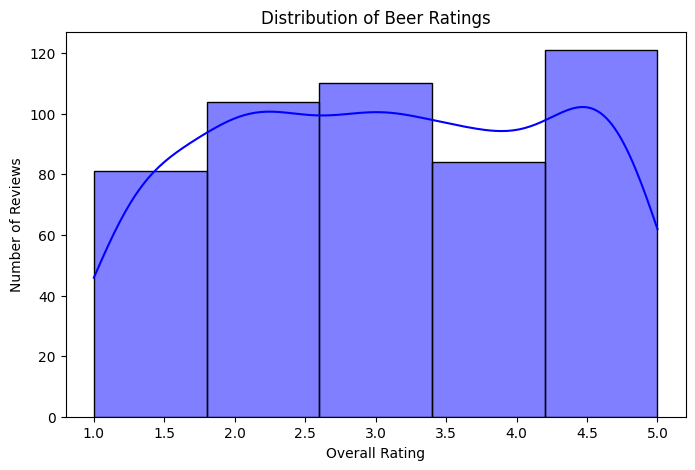

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df["review/overall"], bins=5, kde=True, color='blue')
plt.xlabel("Overall Rating")
plt.ylabel("Number of Reviews")
plt.title("Distribution of Beer Ratings")
plt.show()


In [129]:
most_common_rating = df["review/overall"].mode()[0]
print(f"The most common beer rating is: {most_common_rating}")

The most common beer rating is: 2.9


In [130]:
avg_rating_by_style = df.groupby("beer/style")["review/overall"].mean().sort_values(ascending=False)
print(avg_rating_by_style.head(10))  # Show top 10 beer styles


beer/style
1    3.444
5    3.416
3    3.146
8    3.116
9    3.052
6    3.050
7    2.986
4    2.904
2    2.830
0    2.822
Name: review/overall, dtype: float64
